<a href="https://colab.research.google.com/github/SIVANESAN2061/digit_audio_reg/blob/main/exp_2_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
from librosa import display
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

<ipython-input-3-9f866dd550d6>:14: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=audio, sr=sr, x_axis='time', ax=axs[i])
<ipython-input-3-9f866dd550d6>:14: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y=audio, sr=sr, x_axis='time', ax=axs[i])


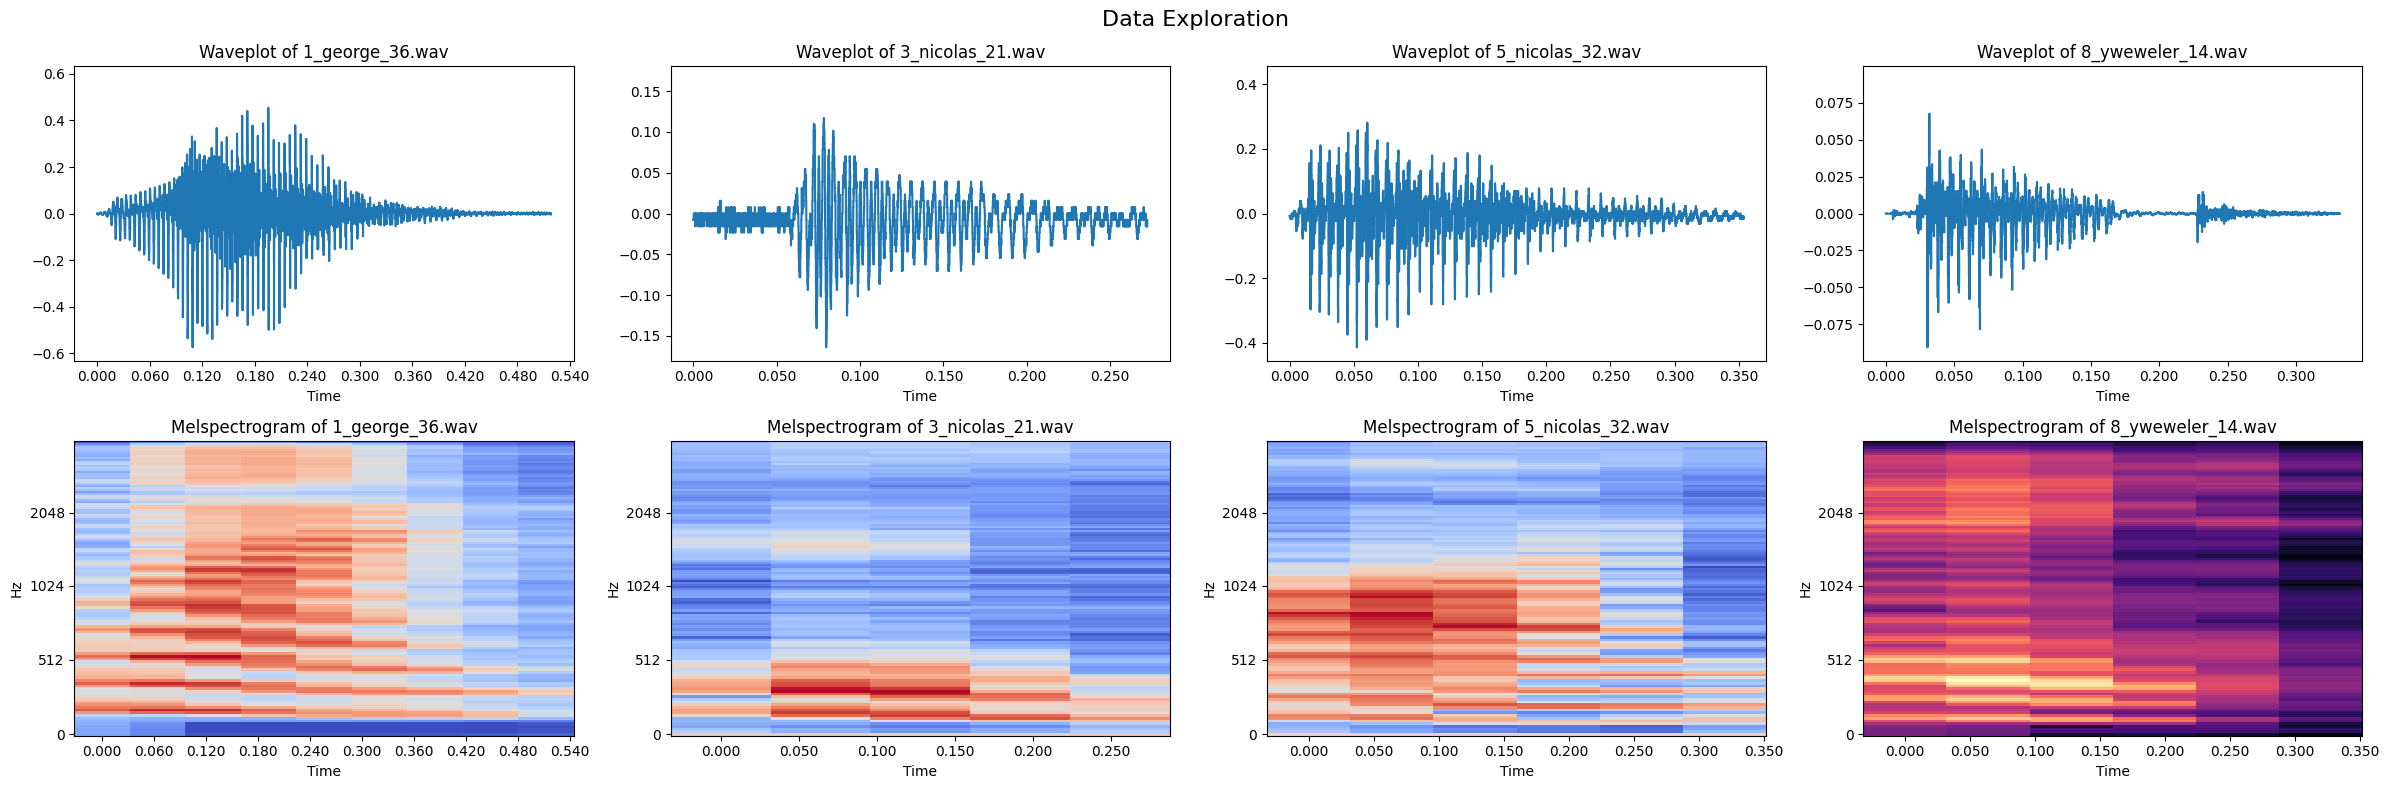

In [ ]:
visualize_digits = [1, 3, 5, 8]

description = pd.read_csv('/content/drive/MyDrive/PROJECT/rec/train.csv')
fig, axs = plt.subplots(nrows=2, ncols=(len(visualize_digits)))
axs = axs.flatten()
fig.suptitle('Data Exploration', fontsize=16)
fig.set_size_inches(24, 8)

for i, digit in enumerate(visualize_digits):
    # Select random file for the selected digit
    rand_file = np.random.choice(description[description['label'] == digit]['file_name'])
    # Load audio and plot waveform and melspectrogram
    audio, sr = librosa.load(os.path.join('/content/drive/MyDrive/PROJECT/rec/recordings', rand_file), sr=None)
    librosa.display.waveshow(y=audio, sr=sr, x_axis='time', ax=axs[i])
    axs[i].set(title=f'Waveplot of {rand_file}')
    mels_db = librosa.power_to_db(S=librosa.feature.melspectrogram(y=audio, sr=sr), ref=1.0)
    librosa.display.specshow(data=mels_db, sr=sr, x_axis='time', y_axis='mel', ax=axs[i + len(visualize_digits)])
    axs[i + len(visualize_digits)].set(title=f'Melspectrogram of {rand_file}')

plt.tight_layout()
plt.show()

In [ ]:
feature_list = []
label_list = []

# Iterate over all files in the given source path
print('Preparing feature dataset and labels.')
for file in tqdm(os.listdir('/content/drive/MyDrive/PROJECT/rec/recordings')):
    # Skip if it's not a wav file
    if not file.endswith('.wav'):
        continue
    # Load audio and stretch it to a length of 1s
    audio_path = os.path.join('/content/drive/MyDrive/PROJECT/rec/recordings', file)
    audio, sr = librosa.load(path=audio_path, sr=None)
    audio = librosa.effects.time_stretch(y=audio, rate=len(audio) / sr)
    # Calculate features and get the label from the filename
    mels = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=512)
    mels_db = librosa.power_to_db(S=mels, ref=1.0)
    feature_list.append(mels_db.flatten())  # Flatten the melspectrogram to use it as features
    label_list.append(file[0])

features = np.array(feature_list)
labels = np.array(label_list)


Preparing feature dataset and labels.


100%|██████████| 3020/3020 [02:21<00:00, 21.40it/s]


k = 1 - Test Accuracy: 95.92%
k = 2 - Test Accuracy: 94.92%
k = 3 - Test Accuracy: 95.25%
k = 4 - Test Accuracy: 95.70%
k = 5 - Test Accuracy: 95.36%
k = 6 - Test Accuracy: 94.48%
k = 7 - Test Accuracy: 94.81%
k = 8 - Test Accuracy: 93.93%
k = 9 - Test Accuracy: 93.49%
k = 10 - Test Accuracy: 93.27%


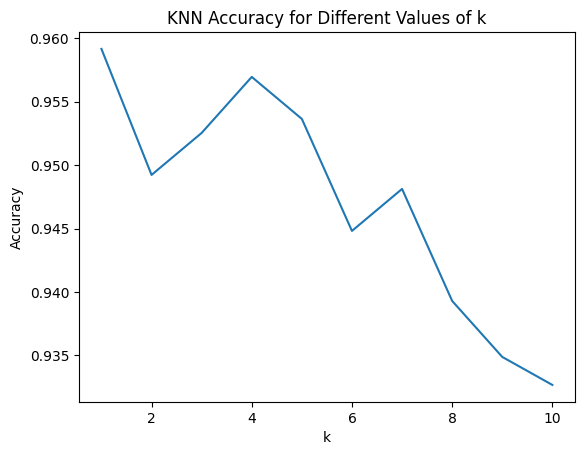

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Flatten the spectrogram data
X_flat = features.reshape(features.shape[0], -1)
TEST_SIZE = 0.3
# Split dataset to train and test data
X_train, X_test, y_train, y_test = train_test_split(X_flat, labels, test_size=TEST_SIZE, random_state=42)

# Initialize a list to store accuracies at each k value
k_accuracies = []

# Test different values of k
for k in range(1, 11):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_model.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy for this k value
    k_accuracies.append(accuracy)

    print(f'k = {k} - Test Accuracy: {accuracy:.2%}')

# Plot the accuracy for different k values
plt.plot(range(1, 11), k_accuracies)
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


Accuracy: 93.49%


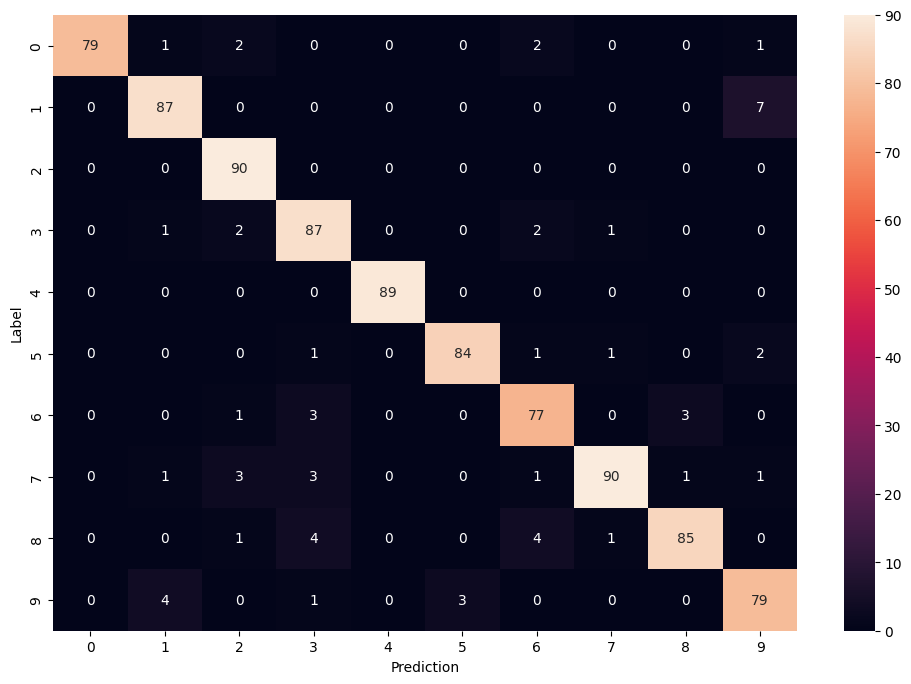

List of accuracies: [0.934878587196468]


In [ ]:
# Initialize a list to store accuracies
accuracies = []

# Make predictions on the test set
y_predicted = knn_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_predicted)
accuracies.append(accuracy)
print(f'Accuracy: {accuracy:.2%}')

# Plot the confusion matrix
label_names = np.unique(labels)
conf_matrix = confusion_matrix(y_test, y_predicted, labels=label_names)

fig = plt.figure()
fig.set_size_inches(12, 8)
sns.heatmap(conf_matrix, xticklabels=label_names, yticklabels=label_names, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

# Print or visualize the list of accuracies
print("List of accuracies:", accuracies)